# BindsNET Network Structure

## Overview
Detailed documentation of the node creation process has been specified [here](https://bindsnet-docs.readthedocs.io/guide/guide_part_i.html#creating-a-network). This document will go into more specific examples of configuring a spiking neural network in BindsNET.

## Import Statements

In [54]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from bindsnet.encoding import *
from bindsnet.network import Network
from bindsnet.network.nodes import Input, LIFNodes, IFNodes, SRM0Nodes
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
from bindsnet.network.monitors import NetworkMonitor

from bindsnet.analysis.plotting import plot_spikes, plot_voltages, plot_input, plot_weights

## Network Structure

`Network` object is responsible for the coordination of simulation of all its constituent components: neurons, synapses, learning rules, etc.

The `dt` argument specifies the simulation time step in milliseconds

In [55]:
network = Network()



`Nodes` object describes the neural model for each layer of the network. The command below creates a single layer with two LIF neurons.

In [56]:
network = Network()

lif_layer = LIFNodes(n=2)

`Nodes` (layer) objects get added to the `Network` object

In [57]:
network = Network()

lif_layer = LIFNodes(n=2)

network.add_layer(
    layer=lif_layer, name="LIF population"
)

`AbstractConnection` objects connect the layers

In [58]:
# Create two populations of neurons, one to act as the "source"
# population, and the other, the "target population".
input_layer = Input(n=4)
lif_layer = LIFNodes(n=2)

# Connect the two layers.
connection = Connection(
    source=input_layer, target=lif_layer
)

# add the two layers to the network
network.add_layer(
    layer=input_layer, name="Input Layer"
)
network.add_layer(
    layer=lif_layer, name="LIF Layer"
)

# weights specified in connection
network.add_connection(
    connection=connection, source="Input Layer", target="LIF Layer"
)

`Montior` objects can record tensor valued variables (state variables from `Nodes` and `AbstractConnections` objects) over time

In [59]:
network = Network()

input_layer = Input(n=4)
lif_layer = LIFNodes(n=2)

# simulation duration in milliseconds
time = 100

connection = Connection(
    source=input_layer, target=lif_layer
)

# Create a monitor.
lif_layer_monitor = Monitor(
    obj=lif_layer,
    state_vars=("s", "v"),  # Record spikes and voltages.
    time=time,  # Length of simulation (if known ahead of time).
)

# add layers to network
network.add_layer(
    layer=input_layer, name="Input Layer"
)
network.add_layer(
    layer=lif_layer, name="LIF Layer"
)

# add connection to network
network.add_connection(
    connection=connection, source="Input Layer", target="LIF Layer"
)

# add monitor to the network
network.add_monitor(monitor=lif_layer_monitor, name="LIF Layer")

`Network.run` used to simulate the network on provided input data

([[<matplotlib.lines.Line2D at 0x2037a3c7fa0>]],
 <AxesSubplot:title={'center':'LIF Layer voltages for neurons (0 - 1) from t = 0 to 100 '}, xlabel='Simulation time', ylabel='Voltage'>)

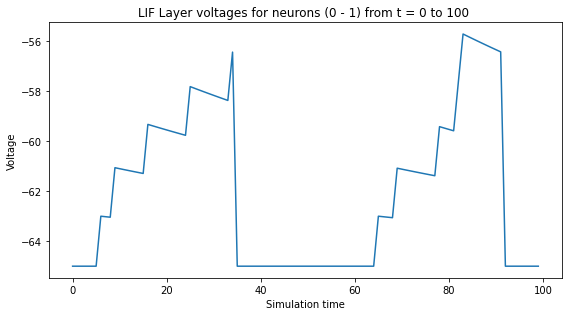

In [60]:
# initialize network
network = Network()

# set number of neurons
input_neurons = 1
lif_neurons = 1

# simulation time
time = 100
dt = 1

# configure weights for the synapses between the input layer and LIF layer
w = torch.round(torch.abs(2 * torch.randn(input_neurons, lif_neurons)))

# initialize input and LIF layers
input_layer = Input(n=input_neurons)
lif_layer = LIFNodes(n=lif_neurons,thresh=-55)

# connection between the input layer and the LIF layer
connection = Connection(
    source=input_layer, target=lif_layer,w=w
)

# create a monitor
lif_layer_monitor = Monitor(
    obj=lif_layer,
    state_vars=("s", "v"),  # Record spikes and voltages.
    time=time,  # Length of simulation (if known ahead of time).
)

# add layers to network
network.add_layer(
    layer=input_layer, name="Input Layer"
)
network.add_layer(
    layer=lif_layer, name="LIF Layer"
)

# add connection to network
network.add_connection(
    connection=connection, source="Input Layer", target="LIF Layer"
)

# add monitor to the network
network.add_monitor(monitor=lif_layer_monitor, name="LIF Layer")

# create input spike data, where each spike is distributed according to Bernoulli(0.1)
input_data = torch.bernoulli(0.1 * torch.ones(time, input_layer.n)).byte()
encoded_image = input_data
inputs = {"Input Layer": input_data}

# simulate network on input data
network.run(inputs=inputs, time=time)

# retrieve and plot simulation spike, voltage data from monitors
spikes = {"LIF Layer": lif_layer_monitor.get("s")}
voltages = {"LIF Layer": lif_layer_monitor.get("v")}

# plot spikes and voltages of the LIF layer
plot_voltages(voltages, plot_type="line")